In [0]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt

# Upload Data

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Total_Renewable_Energy_Consumption_Monthly.csv to Total_Renewable_Energy_Consumption_Monthly.csv


In [3]:
%pwd

'/content'

In [4]:
%ls

sample_data/
Total_Primary_Energy_Consumption_Monthly.csv
Total_Renewable_Energy_Consumption_Monthly.csv


# Load data

In [5]:
df = pd.read_csv('Total_Renewable_Energy_Consumption_Monthly.csv',skiprows=4,index_col='Month',parse_dates=True)
df = df.sort_index()
df.head()

,Series ID: TOTAL.RETCBUS.M Trillion Btu
Month,
1973-01-01,403.981
1973-02-01,360.900
1973-03-01,400.161
1973-04-01,380.470
1973-05-01,392.141


In [6]:
df = df.reset_index()
df.head()

,Month,Series ID: TOTAL.RETCBUS.M Trillion Btu
0,1973-01-01,403.981
1,1973-02-01,360.900
2,1973-03-01,400.161
3,1973-04-01,380.470
4,1973-05-01,392.141


In [7]:
df.columns =['ds','y']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
ds    548 non-null datetime64[ns]
y     548 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


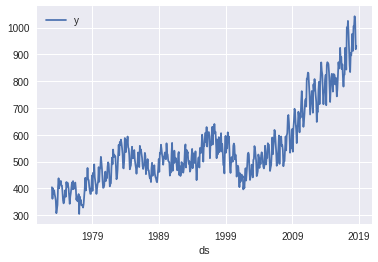

In [8]:
df.plot(x='ds',y='y')

# Model

In [0]:
mymodel = Prophet(interval_width=0.95)

In [10]:
mymodel.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future_dates = mymodel.make_future_dataframe(periods=60, freq='MS')
future_dates.tail()

,ds
603,2023-04-01
604,2023-05-01
605,2023-06-01
606,2023-07-01
607,2023-08-01


In [12]:
forecast = mymodel.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
603,2023-04-01,1121.256422,1041.660128,1200.471751
604,2023-05-01,1148.728245,1057.883521,1240.609426
605,2023-06-01,1132.325621,1052.486718,1209.978826
606,2023-07-01,1125.606775,1042.065381,1208.538984
607,2023-08-01,1102.234476,1015.450671,1184.857509


In [13]:
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'yhat'],
      dtype='object')

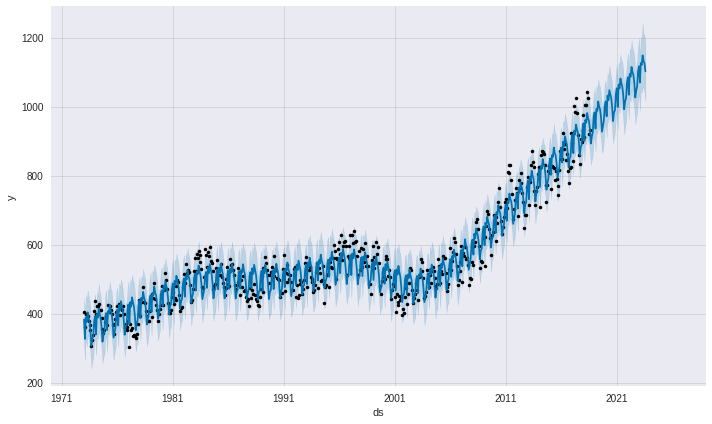

In [14]:
mymodel.plot(forecast,
              uncertainty=True)
plt.xlim(['1970','2029'])
plt.show()

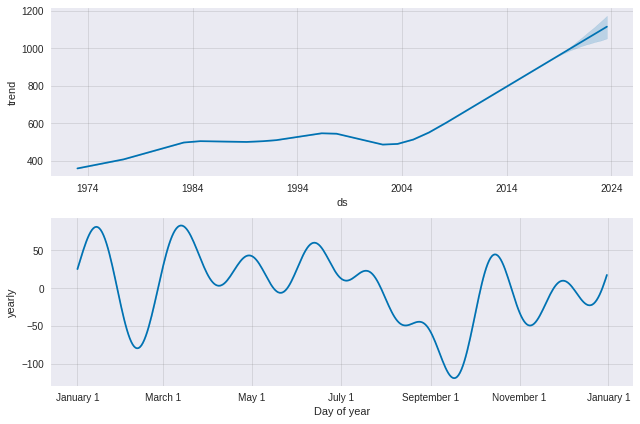

In [15]:
mymodel.plot_components(forecast)
plt.show()

In [16]:
pred = forecast[['ds','yhat']]
pred.head()

,ds,yhat
0,1973-01-01,382.945113
1,1973-02-01,326.425252
2,1973-03-01,389.494257
3,1973-04-01,376.636660
4,1973-05-01,403.602342


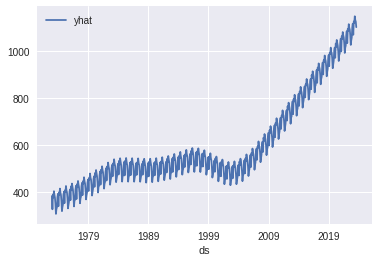

In [17]:
pred = pred.set_index('ds',drop=True)
pred.plot()

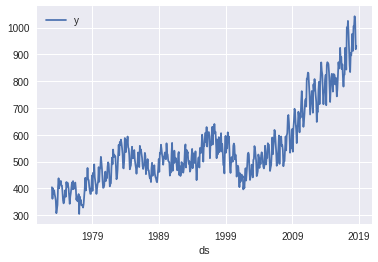

In [18]:
data = df.set_index('ds',drop=True)
data.plot()

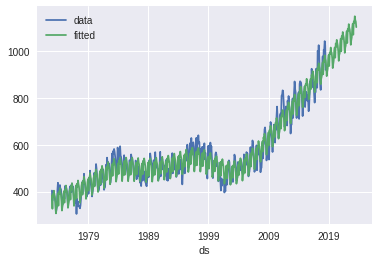

In [19]:
ax = data.plot()
pred.plot(ax=ax)
plt.legend(['data','fitted'])

In [0]:
from sklearn.metrics import mean_squared_error

In [21]:
import math
math.sqrt(mean_squared_error(data,pred.iloc[:len(data),:]))

33.171660525156504